# Regression

- Assumptions of the given regression 

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set()

## Linear Regression

### Assumptions

- **Linearity**
  - Linear relationship between Predictor variables (`X`) and Outcome variables (`y`)
  - Check by **Scatter plot** with Predictor variables and Outcome variable B
    - `sns.pairplot` to plot multiple pair between multiple variables
  - NOTE: If violated, try
    - Take the logarithm to transform data (or other transformations)
- **Independent Observations**
  - Observations are independent to each other, i.e. each data entry is independent to each other
  - Check data collection process
  - NOTE: If violated, try
    - Take just a subset of the available data
- **Normality**
  - <mark>Errors (Residuals) are normally distributed</mark>
    - I.e. difference between observed and predicted for each data point is normally distributed
    - Errors: the _natural noises_ assumed to be in the model
    - Residuals: the _difference_ between predicted and observed values
      - Calculated after building the model
  - Check by **Histogram plot** of residuals
  - Check by **Q-Q plot** between the residuals and Normal Distribution
    - After model is constructed, get their residuals `model.resid`
    - Then, import the modules `import statsmodels.api as sm`
    - Then, plot Quartile-Quartile plot by `sm.qqplot(model.resid, line='s')`
  - NOTE: If violated, try
    - Take the logarithm on dependent variable (y) or X
- **Homoscedasticity**
  - <mark>Residuals have constant or similar variance across the model</mark>
    - I.e. the difference between observed and predicted is within a similar range
  - Check by residual plots
    - I.e. **Scatter plot** between residuals and fitted values (i.e. predicted values)
  - NOTE: If violated, try
    - Define a different dependent variable
    - Transform the Y variable

In [16]:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
from statsmodels.regression.linear_model import OLS

In [17]:
# NOTE: subset original data as analysis example
df = (
    sns.load_dataset("penguins")
    .query("species.isin(['Adelie', 'Gentoo'])")
    .dropna()
)
print(df.shape)
df.head()

(265, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Regression Test: Predict "Body Mass" from "Bill Length"

- Check model assumptions
  - Linearity 
  - Normality
  - Homoscedasticity

> Check "Linearity" assumpation between y and X

- y as "Bill Length", X as "Body Mass"

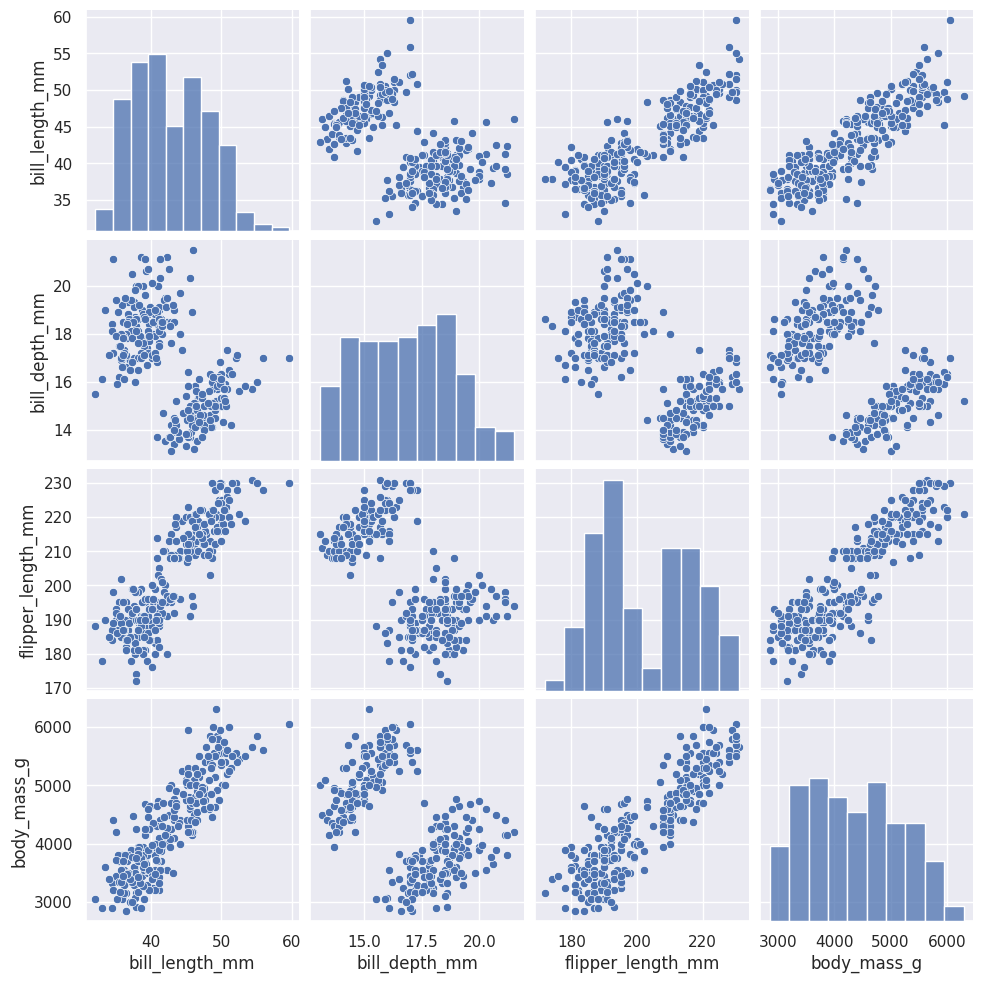

In [29]:
sns.pairplot(df)

Linear Relationships

- bill length and flipper length
- bill length and body mas
- flipper length and body mass

> Model with Simple Linear Regression

In [26]:
formula = "body_mass_g ~ bill_length_mm"
result = OLS.from_formula(formula, data=df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.33e-85
Time:                        13:11:16   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.

> Check Normality, i.e. Residuals are normally distributed

- Histogram
- Residual Plot

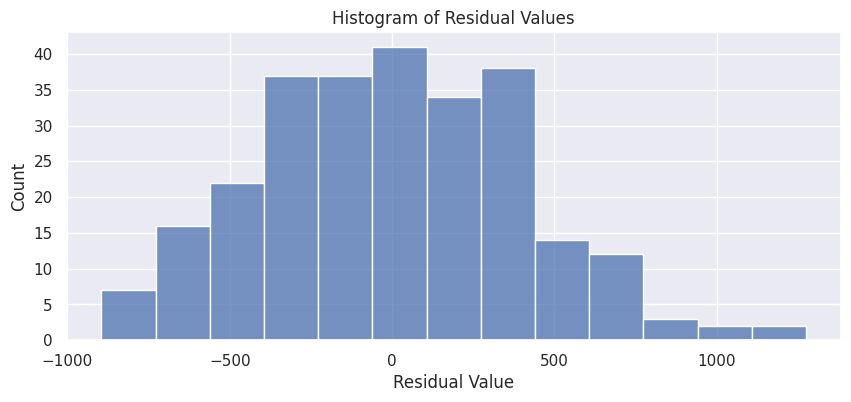

In [35]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(result.resid, ax=ax)
ax.set_xlabel("Residual Value")
ax.set_title("Histogram of Residual Values")
fig.show()

- Somewhat normally distributed

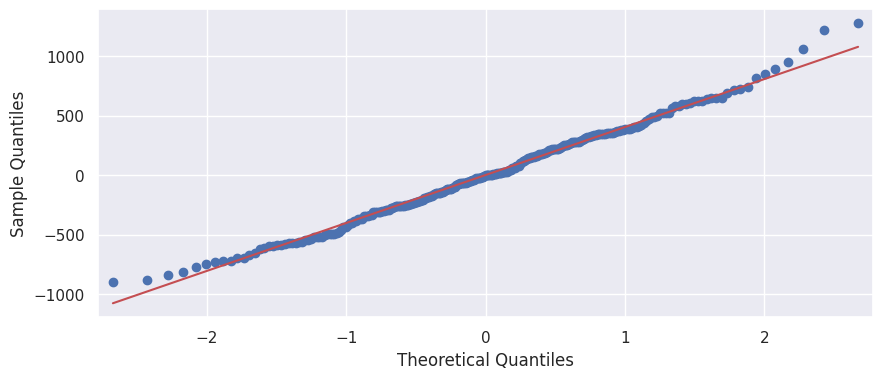

In [40]:
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(figsize=(10, 4))
qqplot(result.resid, ax=ax, line="s")
fig.show()

> Check Homoscedasticity

- Residuals have constant or similar variance across the model

In [41]:
preds = result.predict(df.bill_length_mm)
preds.shape

(265,)

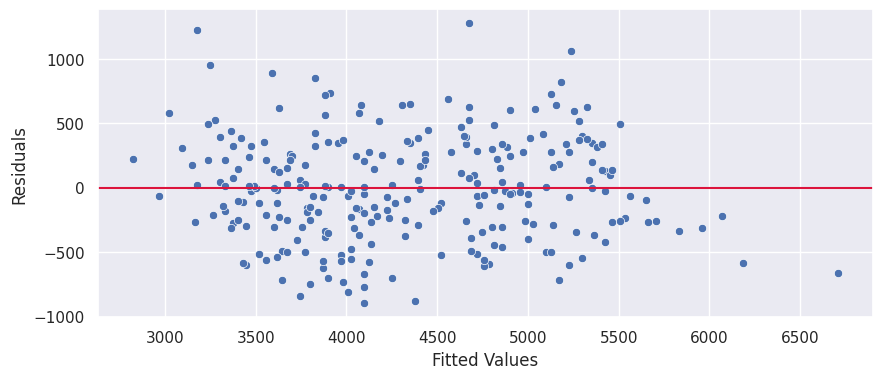

In [47]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(x=preds, y=result.resid, ax=ax)
ax.axhline(0, color="crimson")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
fig.show()

## Multiple Linear Regression

### Assumptions

- **Linearity**
  - Each independent variable (X) is linearly related to the dependent variable (y)
    - Independent = Predictor, Dependent = Outcome
  - Check by:
    - Scatter plot between each X and y, expect somewhat linear relationship between them
      - E.g. `sns.pairplot`
- **Independent observations**
  - Each observation in the dataset is independent to each other
  - Check by:
    - Review the data collection process
- **<mark>(Multivariate) normality</mark>**
  - Errors (Residuals) are normally distributed
    - I.e. the difference between predicted and observed values are normally distributed
  - Check by Q-Q Plot, between Model Residuals and Normal Distribution
    - Expect plot shows a diagonal line of around 45 degrees
  - Check by Histogram of the Residuals, if is close to Normal DistributionN
    - Expect to be like Normal Distribution
- **Homoscedasticity**
  - Variation of the errors is constant or similar across the model
  - Check by Residual plot:
    - I.e. Scatter plot between residuals and predicted values 
      - Expect the variation on Y-axis within a constant/similar range across whole X-axis
- **<mark>No multicollinearity</mark>**
  - <mark>Any of the two independent variables (X) are NOT highly correlated with each other</mark>
  - Check by **Scatter plot** between X variables
      - Expect NO straight line pattern
  - Check by **Variance Inflation Factors (VIF)**
    - Quantify how much the variance of each variable is "inflated" due to correlation with other X variables
    - `from statsmodels.stats.outliers_influence import variance_inflation_factor`
    - VIF = 1 => No Correlation
  - NOTE: If violated, try
    - Keep only one of the correlated variables
      - **Forward Selection**
        - Begins with null model (0 independent variable)
      - **Backward Elimination**
        - Begins with full model (all of the independent variables)
    - **Lasso Regression** (Regularization)
      - Completely remove the X variables that are not important in predicting y
      - NOTE: <font color='blue'>Lasso AS "套索", so non-relevant variables are looped and removed from the equation!</font>
    - **Ridge Regression** (Regularization)
      - Minimize the impact from X variables that are not important
      - Not removing any X variable
    - Principal component analysis (PCA)

### Interpretations

> Results from `statsmodels.api`

- Coefficients `p-values` (for each coefficient)
  - Hypotheses
    - Null: coefficient = 0
    - Alternative: coefficient != 0
  - If `p-value` < significance level, reject the null hypothesis
    - The coefficient is statistically significant
    - The given X (independent) is correlated to y (dependent)
- Coefficients `Confidence Intervals`
  - With 95% Confidence Interval
    - the interval has a 95% chance of containing the true parameter value of the coefficient
    - if you were to repeat this experiment many times, 95% of the confidence intervals would contain the true value
  - Confidence Band
    - the line that describes the uncertainty around the predicted outcome

## Logistic Regression

### Assumptions

## Model Evaluations

- **R², R-Squared**
  - **Coefficient of Determination**, value between 0 and 1; the higher the better
  - **Proportion of variation in `y` that is explained by `X`** (all of X variables)
  - To get better model explanations: proportion of variation that is explained
  - Formula
    - `1 - Unexplained Variation`
    - Unexplained Variation = 
      - `(Sum of Squared Residuals)`, divided by `Total Sum of Squares`
  - Issues
    - With more X variables, difficult to tell which contributes to the explained variations
    - Higher R-Squared might happen due to over-fitting
- **Adjusted R²**
  - R-Squared but **penalises unnecessary explanatory variable**
  - To compare models of varying complexity
    - By adding or removing a variable, and then compare the Adjusted-R²
  - Between 0 and 1
- **MAE**, Mean Absolute Error
  - Average of the absolute difference between the observed and predicted values
  - Good to use with data having outliers that should be excluded/ignored in evaluation
  - _Not too sensitive to large errors_
- **MSE**, Mean Squared Error
  - Average of the squared difference between the observed and predicted values
  - Sensitive to large errors, because the differences are _squared_
- **AIC (Akaike information criterion)**
  - https://machinelearningmastery.com/probabilistic-model-selection-measures/
  - ...
- **BIC (Bayesian information criterion)**
  - ...
- **Bias & Variance trade-off**
  - **High Bias: under-fit with the sample data**
    - Over-simplify the variable relationships by making assumptions
    - <mark>NOTE: Bias-Under</mark>, more bias leads to more under-fitting
    - NOTE: Simply saying `y = 2` is a "High Bias (under-fitting)" model
  - **High Variance: over-fit with the sample data**
    - NOTE: Variance-Over
    - Learned from existing data and incorporate flexibility and complexity

## References

- [Underfitting and overfitting](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/supplement/jtFae/underfitting-and-overfitting)
- 